In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(low=-3.0, high=3.0, size=100)
y = 0.5 * (x**2) + x + 2 + np.random.normal(0, 1, size=100)
X = x.reshape(-1,1)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
X_train.shape

(75, 1)

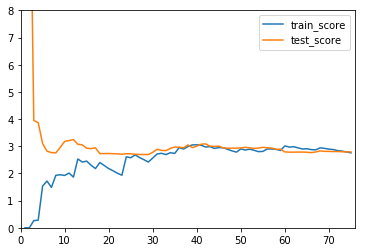

In [14]:
#欠拟合
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
Lin = LinearRegression()
train_score = []
test_score = []
for i in range(1,76):
    Lin.fit(X_train[:i],y_train[:i])
    y_train_predict = Lin.predict(X_train[:i])
    y_train_mean_squared = mean_squared_error(y_train[:i], y_train_predict)
    train_score.append(y_train_mean_squared)
    
    y_test_predict = Lin.predict(X_test)
    y_test_mean_squared = mean_squared_error(y_test, y_test_predict)
    test_score.append(y_test_mean_squared)
plt.plot([i for i in range(1,76)], train_score, label='train_score')
plt.plot([i for i in range(1,76)], test_score, label='test_score')
plt.legend()
plt.axis([0, 76, 0, 8])
plt.show()

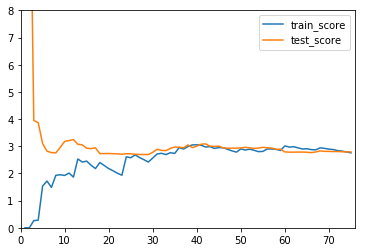

In [19]:
# 为方便调用,编写一个函数
def plot_learning_curve(model, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1,76):
        model.fit(X_train[:i],y_train[:i])
        y_train_predict = model.predict(X_train[:i])
        y_train_mean_squared = mean_squared_error(y_train[:i], y_train_predict)
        train_score.append(y_train_mean_squared)

        y_test_predict = model.predict(X_test)
        y_test_mean_squared = mean_squared_error(y_test, y_test_predict)
        test_score.append(y_test_mean_squared)
    plt.plot([i for i in range(1,76)], train_score, label='train_score')
    plt.plot([i for i in range(1,76)], test_score, label='test_score')
    plt.legend()
    plt.axis([0, 76, 0, 8])
    plt.show()
plot_learning_curve(Lin,  X_train, X_test, y_train, y_test)

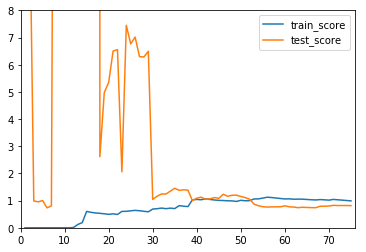

In [24]:
#过拟合
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
def polyRegression(degree):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("lin_reg", LinearRegression())
            ])
poly_reg100 = polyRegression(degree=10)
plot_learning_curve(poly_reg100,  X_train, X_test, y_train, y_test)

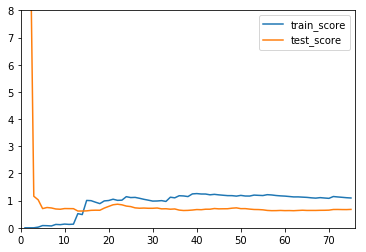

In [25]:
# 既不过拟合,也不欠拟合
poly_reg2 = polyRegression(degree=2)
plot_learning_curve(poly_reg2,  X_train, X_test, y_train, y_test)

可以看到,欠拟合测试集的mean_square 落在3附件,   
         过拟合测试集的mean_square 落在1附件,但是前期波动很大,mean_square 也很大    
         既不欠拟合,也不过拟合的测试集mean_square 落在0.5附件,并且 波动较小, 比较可观。
        